# Compte rendu des premiers essais

Le but de ce document est de rendre compte de la progression du projet au fil des séances.

# Introduction

## Les cordes vocales 

## Premier modèle : des cordes vocales à partir d'un système multi-masse.

La première méthode populaire pour modéliser des cordes vocales à partir de phénomènes physique a été celle de J. L Flanagan dans un article intitulé <em>source system interaction in the vocal tract</em> paru en 1968.
C'est à partir de cette idée que nous allons réaliser notre première modélisation de corde vocale. Nous n'en garderons en réalité que l'idée car les calculs présentés dans l'article dépasse pour l'instant nos compétence. De plus, le but est de produire un premier résultat rapidement pour bien cerner les limites et difficultées du projet.

Voici une description rapide du système de masses oscillantes que nous allons utiliser : 

![masse-ressort](unnamed.gif)

Dans un premier temps, on ne tiendra pas compte de l'amortissement fluide $C$.

En appliquant le principe fondamental de la dynamique, on obtient :

$$m\ddot{y} = -2T\sin(\theta) = -2k(s-a_0)y/s$$

$$\omega^2 = -\frac{\ddot{y}}{y} = \frac{2k}{m}\left(1-\frac{a_0}{a}\right)$$

$$f = \frac{1}{\pi}\sqrt{\frac{T}{ml}} $$

### Remarque

>En comparant la loi de Hooke et la formule qui déterminer le module de Young $E$, on peut trouver une relation de proportionnalité inverse entre $k$ la constante de raideur du ressort et $l$ la longueur des ressort, qui seront ici en fait des bandes élastiques.

$$F= \frac{AE}{l}\Delta l \;\;\; F=-k\Delta{l} \; \implies k \propto \frac{1}{l}$$

On a obtenu la fréquence à laquelle vibre nos cordes vocales, on peut calculer cette fréquence pour $f_n$ où $f_1$ est la fréquence fondamentale.

$$f_n = \frac{1}{\pi}\sqrt{\frac{n^2}{ml}} $$

Pour comprendre comment ce model fonctionne, il faut s'imaginer une ribenbelle de petites masses oscillantes tel que pour la n-ième masse d'une série de masses oscillantes, sa taille et la longueur de son élastique est $1/n$ celle de la première. Bien sûr, il peut y avoir plusieurs séries de masse différentes partant d'un fréquence $f_1$ différente.

## Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import struct

#Default values are m = 0.15 * 10**(-3) kg, l = 1.4 * 10**(-3) m, T = 3 N
m = 0.15 * 10**(-3) #kg 
l = 1.4 * 10**(-3) #m
T =  1#N

In [3]:
def frequency_from_fundamental(n, round_at=0, logs=False):
    
    """Calculate frequency based on a {mass + ruberband} system."""

    frequency = 1/np.pi * np.sqrt(n**2*T/(m*l))
    
    if round_at:
        frequency = round(frequency, round_at)
        
    if logs:
        print("fundamental frequency : ", 1/2 * np.sqrt(T/(m*l)), "Hz")
        print("frequency", n,  "is", frequency, "Hz")
        
    return frequency

def add_sine_waves(listOfSineWave, logs=False):
    
    """Sums list of float64 term by term"""
    
    sumOfSineWaves = np.copy(listOfSineWave[0])

    if logs: 
        print("sumOfSineWaves", sumOfSineWaves)
        print(listOfSineWave.ndim)

    for i in range(1, len(listOfSineWave)):
        sumOfSineWaves += listOfSineWave[i]
        #print("sum at", i, ",", sumOfSineWaves)

    if logs:
        print("sumOfSineWaves :", sumOfSineWaves)

    return sumOfSineWaves

def createWaveFile(name, listOfSineWave, samplingRate = 44100, logs=False):
    
    """Create .wav file from a list of float64"""

    F = wave.open(str(name) + '.wav', 'wb')
    F.setnchannels(1)
    F.setsampwidth(2)
    F.setframerate(samplingRate)

    if logs:
        print("dimension of listOfSines array :", listOfSineWave.ndim)

    if listOfSineWave.ndim == 1:
        print(listOfSineWave)
        for w in listOfSineWave:
            F.writeframes(struct.pack('f', w))
    else:
        for sine in listOfSineWave:
            print(sine.shape)
            for w in sine:
                #print(type(int(w)))    
                F.writeframes(struct.pack('f', w))
    F.close()
    print(str(name) + ".wav successfully created!")

[     0.         895936.92178044 673345.4267005  ...  18588.83050417
   3663.57417591 -47294.8606123 ]
catastrophe.wav successfully created!


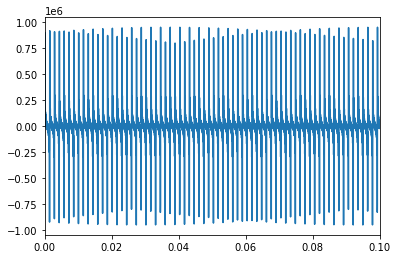

In [4]:
def main():
    samplingRate = 44100
    samplingInterval = 1/samplingRate

    nLowHarmonics = 5
    nHighHarmonics = 18
    amplitudelow = 5000
    amplitudehigh = 70000

    t = np.arange(0, 1, samplingInterval)
    lowFrequencySineWaves = np.zeros((nLowHarmonics, t.size))
    highFrequencySineWaves = np.zeros((nHighHarmonics, t.size))

    #Creating the lower harmonics from the lower fundamental
    for i in range(nLowHarmonics):
        #create sine wave from lower frequencies
        lowFrequencySineWaves[i] = amplitudelow * np.sin(2*np.pi*frequency_from_fundamental(i+1, round_at=0) * t)
        #plt.plot(t, sine_waves[i])
    #print("lowFrequencySineWaves", lowFrequencySineWaves)
    
    #Creating the higher harmonics from the higher fundamental
    for i in range(nHighHarmonics):
        #create sine wave from lower frequencies
        highFrequencySineWaves[i] = amplitudehigh * np.sin(2*np.pi*frequency_from_fundamental(i+1, round_at=0) * t)
        #plt.plot(t, sine_waves[i])
    #print("highFrequencySineWaves", highFrequencySineWaves)

    #Arbitrarly modifying our data so it sounds a little bit less terrible (and so it fits the data)
    np.delete(lowFrequencySineWaves, 1)
    np.delete(lowFrequencySineWaves, 2)
    np.delete(lowFrequencySineWaves, 3)

    sine_waves = np.concatenate((lowFrequencySineWaves, highFrequencySineWaves))
    #print("waves:", sine_waves)
    createdSineWave = add_sine_waves(sine_waves)
    createWaveFile("catastrophe", createdSineWave, samplingRate=samplingRate)

    plt.plot(t, createdSineWave)
    plt.xlim(0, 0.1)
    plt.show()

if __name__ == "__main__":
    main()

Les fichiers sons sont enregistrés dans le dossier du projet.

Les fréquences ont été choisie par rapport au spectre de la prononciation du son 'a' de "avion" récupérer grâce à Audacity.

![spectre](spectre.png)

Pour l'instant, les résultats sont catastrophiques et nécessitent d'être tweaker pour être descent. 

Nous allons utiliser des transformées de fourier (et peut être des transformées de fourier inverse) afin d'analyser et d'optimiser les résultats.

## Second modèle : un système masse-ressort amortie et excité.

L'un des soucis majeur de notre premier modèle est qu'il ne représente pas très bien le fontionnement des cordes vocales. En effet ces dernières ne sont pas vraiment constituées de multitudes de petites masses oscillantes organisées en une longue rangée, mais plutôt de deux masses assez molle qui intéragissent entre elles. Ce second modèle s'appuiera donc d'avantage sur les caractéristiques physiques des cordes vocales.

### Modèle

Dans ce modèle, on va apparenter les cordes vocales à des ressorts amortis excités par les forces de pressions exercées par l'air expulsé comme le montre ce schéma.

<img src="system_masse_ressort.png" alt="schema" width="400"/>

Dans ce schéma $\vec{f}$ représente les forces de pressions exercées par l'air sur le ressort.

On se placera dans le référentiel d'une des deux cordes vocales pour n'avoir à en modéliser qu'une seule et donc qu'une seule masse. Cela simplifiera grandement nos calculs.

#### Hypothèses
- On ne tiens toujours pas compte du canal vocal.
- On analysera seulement le mouvement horizontal des cordes vocales.

- La pression et la quantité d'air expulsée des poumons sont constantes.
- Les cordes vocals sont modèliser par un système $\left \{ masse+ressort \right \}$.
- On ne tient pas compte de l'humidité des cordes vocales, donc pas de force de glissement.
- La texture des cordes vocals est représentée par un coefficient d'amortissement non linéaire dont la valeur est en partie arbitraire.
- Le système $\left \{ masse + ressort + larynx + glotte + trachée + air \right \}$ est isolé.

<img src="schema.png" alt="schema" width="400"/>

Ce schéma et le précédent serviront de base à notre modèle, ici $L$ représente la largeur des cordes, $y$ leur hauteur, $T/2$ la moitié de leur hauteur, $x_0$ l'écartement initiale des deux tissus et $x$ le déplacement horizontal des cordes vocales.

Établissons les équations de la dynamique d'un ressort linéairement amorti :

Pour un ressort amorti à l'équilibre:

$$M\ddot{x} + B\dot{x} + Kx = 0$$

où $B$ est le coefficient de frottements visqueux, $K$ la constante de raideur du ressort et $M$ la masse du ressort.

Afin d'avoir une meilleur approximation de la viscosité du frottement des cordes vocales :

$$M\ddot{x} + B(1+\eta\dot{x}) + Kx = 0$$

où $\eta$ est un coefficient phénoménologique non linéaire.

### Flot d'air sortant et équation de Bernouilli

Nous avons besoin d'intégrer la pression de l'air sortant des poumons à notre modèle. Observons ce schéma pour comprendre comment l'air se comporte au niveau de la glotte.

<img src="glotte.png" alt="schema" width="400"/>

Lorsque les poumons sont remplis d'air et que la glotte est fermé, l'air au niveau du pharynx est à une pression plus basse que celui dans la trachée. Lorsque la glotte s'ouvre, l'air qui était au niveau de la trachée est expulsé vers le pharynx jusqu'à l'extèrieur du canal vocal. Ce qu'on veut nous, c'est modéliser l'effet du passage de cette air sur les cordes vocales. Pour ce faire on va imaginer, comme sur le premier schéma que l'air passant pousse lattéralement le ressort amorti qui simule nos tissus.

Pour ce faire, il nous faut poser quelque hypothèses supplémentaires :

- L'air passant dans la glotte est incompressible 
- On ne prend pas en compte les forces de frictions de l'air
- Les effets visqueux sur l'air passant sont négligeable
- Il n'y a pas de perte de pression au niveau des poumons ni à la trachée.

Sous ces conditions on peut appliquer les équations de Bernouilli à notre fluide et en déduire la différence de pression entre la trachée et le pharynx.

Rappelons les équations de Bernouilli, sur une même ligne de courant, la quantité de Bernouilli 

$$\frac{v^2}{2} + gz + \frac{p}{\rho}$$

se conserve, on a donc 

$$\frac{1}{2}\rho v^2 + \rho gz + p = constante$$

Ainsi soit $P_L$ la pression à la jonction entre le trachée et la glotte et $P_P$ la pression à la jonction entre le pharynx et la glotte on obtient :

$$\frac{1}{2}\rho v^2 + P_L = \frac{1}{2}\rho v^2 + \rho gy + P_P$$

En simplifiant :

$$P_L - P_P = \frac{\rho v^2}{2a_2^2}$$

où $a_2 = 2L(x_0 + x -\tau\dot{x})$ est l'aire de la coupe transversale de la glotte.

La pression exercées sur la paroi verticale des cordes vocales peut-être considérée comme étant la pression glotale moyenne.

$$P_g = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} P(y) \,dy$$

$$P(y) = \frac{\rho u^2}{2}\left ( \frac{1}{a_{2}^2} - \frac{1}{a(y)^2} \right )$$

$$P(y) = P_L \left ( 1 - \frac{a_{2}^2}{a(y)^2} \right )$$

$$Pg = P_L\left ( 1 - \frac{a_2}{a_1} \right )$$

$$Pg = \frac{2P_L\tau\dot{x}}{x_0+x+\tau\dot{x}}$$

On peut enfin en déduire l'équation finale de mouvement de notre ressort.

On obtient une équation différentielle d'ordre 2 à coefficient non linéaire :

$$M\ddot{x} + B(1+\eta\dot{x}) + Kx = \frac{2P_L\tau\dot{x}}{x_0+x+\tau\dot{x}}$$

avec $x_0 + x + \tau\dot{x} > 0$

Cette inégalité marquera les limites de notre modèle.

### Résolution numérique 

Maintenant que notre modèle est établi, on peut apporter quelque modifications pratiques :

Afin de simplifier l'équation, on peut concevoir des paramètres sans dimension à partir de $M, B, K, P_L, \tau, x_0$ et $\eta$.

On aura donc : 

- $\alpha = B/\sqrt{MK}$ 

- $\beta = x_0^2\eta$ 

- $\gamma = 2\tau P_L/(x_0\sqrt{MK})$ 

- $\delta = \tau/\sqrt{K/M}$ 

On peut alors réécrire notre équation :

$$\ddot{x} + \alpha(1+\beta x^2)\dot{x}+x = \frac{\gamma\dot{x}}{1+x+\delta\dot{x}}$$

Pour résoudre cette équation différentielles à l'aide de la méthode de Runga-Kutta à l'ordre 4, on la décompose en un système d'équadiff d'ordre 1:


$$
\left \{
    \begin{array}{ll}
        u' = v\\
        v' = \alpha(1+\beta u^2)v - u + \frac{\gamma v}{1+u+\delta v}
    \end{array}
\right.
$$

Toujours avec $1+u+\delta v > 0$

Maintenant programmons la résolution de ces équations.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [33]:
#Paramètres initiaux
M, B, K = 0.476, 100, 200000 #Mass g/cm^2 Damping dyne s/cm^3 Stiffness dyne/cm^3
x0, eta = 1 * 10 ** -1, 10000 #cm, /cm/cm phenomenological nonlinear coefficient
Pl = 8000 #dyne/cm^2
T = 0.3 #cm glottal height
c = 100 #cm/s wave velocity
tau = T / (2 * c)

#Paramètres sans dimensions
alpha = B / np.sqrt(M * K)
beta = x0 ** 2 * eta
gamma = 2 * tau * Pl / (x0 * np.sqrt(M * K)) # ++ frequence
delta = tau * np.sqrt(K / M)

def derivee(u, t):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du systeme masse-ressort : d(u0, u1)/dt = (u1, 
        -alpha * (1 + beta * u0**2) * u1 - u0 + (gamma * u1)/(1 + u0 + delta * u1))
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)
    
    # Dérivée de la vitesse
    du[0] = u[1]
    du[1] = -alpha * (1 + beta * u[0]**2) * u[1] - u[0] + (gamma * u[1])/(1 + u[0] + delta * u[1])

    return du 

def RK4(start, end, step, v_ini, derivee, ordre):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i])
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2)
        d4 = derivee(v[:, i] + step * d3, t[i] + step)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Sorties
    return t, v

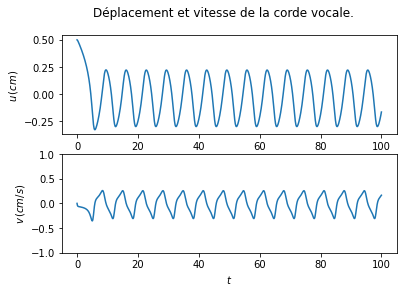

In [35]:
#Script
start = 0
end = 100
step = 0.1

initial_values = [0.5, 0] #déplacement et vitesse initiale

fig, (ax1, ax2) = plt.subplots(2, 1)

t, v = RK4(start, end, step, initial_values, derivee, 2)
ax1.plot(t, v[0])
ax2.plot(t, v[1])
    
plt.xlabel(r"$t$")
ax1.set_ylabel(r"$u \, (cm)$")
ax2.set_ylabel(r"$v \, (cm/s)$")
fig.suptitle("Déplacement et vitesse de la corde vocale.")
plt.ylim(-1, 1)
#plt.legend(bbox_to_anchor=(1, 1))

plt.show()

### Pression glottale

Observons la pressions au niveau de la glotte :

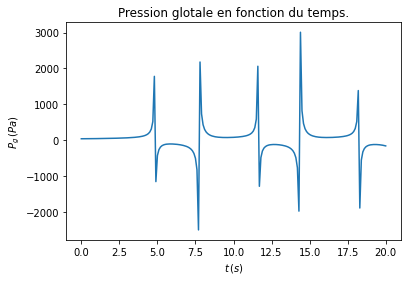

In [8]:
Pg = (2 * Pl * tau)/(x0 + v[0] + tau * v[1])
plt.plot(t, Pg, '-')
plt.title("Pression glotale en fonction du temps.")
plt.xlabel(r"$t \, (s)$")
plt.ylabel(r"$P_g \, (Pa)$")
plt.show()

Dire quelque chose

### Synthèse sonore

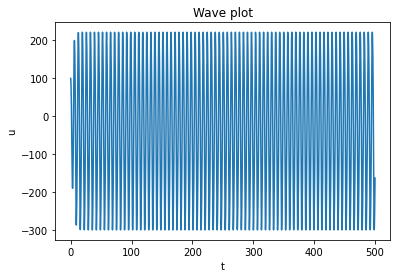

In [83]:
from scipy.io.wavfile import write

samplingRate = 44100 
amplitude = 1000

step = 0.1
start = 0
end = 500


initial_values = [0.1, 0]

t, v = RK4(start, end, step, initial_values, derivee, 2)

signal = amplitude * v[0] #amplification arbitraire
wavFile = write("wav/test.wav", samplingRate, signal.astype("float32"))

plt.plot(t, signal) 

plt.xlabel("t")
plt.ylabel("u")
plt.title("Wave plot")
plt.show()

In [80]:
import IPython.display as ipd

print("Attention les oreilles...")
ipd.Audio('wav/test.wav') #load local WAV file

Attention les oreilles...


On peut analyser les fréquences obtenues grâce aux transformés de fourier.

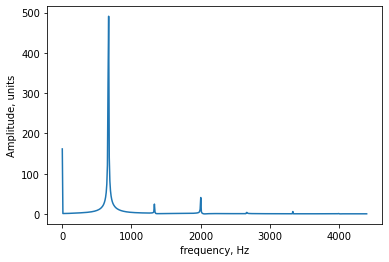

In [93]:
fft_spectrum = np.fft.rfft(v[0])
freq = np.fft.rfftfreq(v[0].size, d=1./samplingRate)

fft_spectrum_abs = np.abs(fft_spectrum)

plt.plot(freq[:500], fft_spectrum_abs[:500])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

Analysons à quelles fréquences correspondent les piques d'amplitudes

In [103]:
for i,f in enumerate(fft_spectrum_abs):
    if f > 100: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} Hz with amplitude {} '.format(np.round(freq[i],1),  np.round(f)))

frequency = 0.0 Hz with amplitude 162.0 
frequency = 652.5 Hz with amplitude 122.0 
frequency = 661.4 Hz with amplitude 325.0 
frequency = 670.2 Hz with amplitude 491.0 
frequency = 679.0 Hz with amplitude 140.0 


On a donc obtenu un signal dont la fréquence fondamental est $670.2 Hz$ avec cette méthode on peut même composer une petite chanson à partir de notre modèle.